In [42]:
# Imports
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn Methoden
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [43]:
# Load Dataset
mnist = load_digits()

x = mnist.data.astype(np.float32)
y = mnist.target.astype(np.float32)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.35)

n_samples, n_features = x.shape
print("Bilder: ", n_samples)
print("Pixel: ", n_features)

Bilder:  1797
Pixel:  64


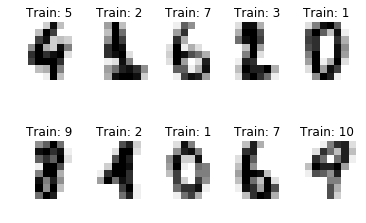

In [44]:
# Plot random images
for index, (image, label) in enumerate(zip(x_train[:10], y_train[:10])):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Train: %i' % (label+1))

In [45]:
# Normalize Features with StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

![title](ovr.png)

![title](sigmoid.png)

In [47]:
clf = LogisticRegression(multi_class="ovr", penalty="l2", solver="lbfgs", n_jobs=-1, verbose=1)
clf.fit(x_train, y_train)

score = clf.score(x_test, y_test)
y_pred = clf.predict(x_test)

print("Score: ", score)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Score:  0.9682034976152624
Confusion matrix:
 [[57  0  0  0  0  0  0  0  0  0]
 [ 0 59  0  0  0  0  0  0  2  0]
 [ 0  0 57  0  0  0  0  0  0  0]
 [ 0  0  1 56  0  1  0  1  3  0]
 [ 0  1  0  0 65  0  0  0  0  0]
 [ 0  0  0  0  0 74  1  0  0  1]
 [ 0  0  0  0  0  1 58  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  1]
 [ 0  2  0  0  0  1  0  0 52  0]
 [ 0  0  0  1  0  1  0  0  2 67]]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.8s finished


In [48]:
clf = LogisticRegression(multi_class="multinomial", penalty="l2", solver="lbfgs", n_jobs=-1, verbose=1)
clf.fit(x_train, y_train)

score = clf.score(x_test, y_test)
y_pred = clf.predict(x_test)

print("Score: ", score)
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Score:  0.9745627980922098
Confusion matrix:
 [[57  0  0  0  0  0  0  0  0  0]
 [ 0 59  1  0  0  0  0  0  1  0]
 [ 0  0 57  0  0  0  0  0  0  0]
 [ 0  0  1 59  0  1  0  0  1  0]
 [ 0  1  0  0 65  0  0  0  0  0]
 [ 0  1  0  0  0 72  1  0  0  2]
 [ 0  0  0  0  0  1 58  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  1]
 [ 0  1  0  0  0  1  0  0 53  0]
 [ 0  0  0  0  0  0  0  0  2 69]]


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


In [49]:
print(clf.decision_function([x_test[0]]))
print(clf.predict_proba([x_test[0]]))

[[ 1.27206574 -1.53566528 -3.3342232  -4.47379186  0.30664109 -0.83522786
   9.1965971  -1.50977444  1.11035039 -0.19697167]]
[[3.61403906e-04 2.18077446e-05 3.60999807e-06 1.15504416e-06
  1.37630359e-04 4.39346183e-05 9.99017462e-01 2.23797381e-05
  3.07440271e-04 8.31759937e-05]]
